<a href="https://colab.research.google.com/github/zainsuch19/entropy-neural-network/blob/main/Heart_Disease%7CEDA%7Cmulticlass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
redwankarimsony_heart_disease_data_path = kagglehub.dataset_download('redwankarimsony/heart-disease-data')

print('Data source import complete.')


Data source import complete.


## **Delve into the depths of predictive analytics to unveil the hidden secrets of heart disease 📊🔍**
![ Alt Text](https://i.imgur.com/zba5UjD.jpeg).

## **1. Title: Heart Disease Prediction 🫀🩺**
---------------------------------

## **2. About the Author 👤**
- **Nasrullah Asghar**

- [**`LinkedIn`**](https://www.linkedin.com/in/inasrullah-asghar)
- ---------------------------------


## **3. Aim**🎯
**`1. Exploratory Data Analysis (EDA)`** 📊  
Exploratory Data Analysis (EDA) is the process of analyzing data sets to summarize their main characteristics, often using visual methods. It helps in understanding the data distribution, identifying patterns, and detecting anomalies.

**`2. Data Preprocessing`** 🔄  
Data preprocessing involves cleaning and transforming raw data into a format suitable for analysis. This step includes handling missing values, encoding categorical variables, and scaling numerical features to ensure accurate model performance.

**`3. Modeling`** 🧠  
Modeling refers to the process of creating a mathematical representation of a system based on the data. It involves selecting appropriate algorithms, training the model on the dataset, and evaluating its performance to make predictions.


## **4. About Dataset 📂**

### **Context**:
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### **Content :**
#### **Column Descriptions:**
- `id` (Unique id for each patient)
- `age` (Age of the patient in years)
- `origin` (place of study)
- `sex` (Male/Female)
- `cp` chest pain type
    1. typical angina
    2. atypical angina
    3. non-anginal
    4. asymptomatic
- `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- `chol` (serum cholesterol in mg/dl)
- `fbs` (if fasting blood sugar > 120 mg/dl)
- `restecg` (resting electrocardiographic results)
-  -- `Values:`
    1. normal
    2. stt abnormality
    3. lv hypertrophy
- `thalach:` maximum heart rate achieved
- `exang:` exercise-induced angina (True/ False)
- `oldpeak:` ST depression induced by exercise relative to rest
- `slope:` the slope of the peak exercise ST segment
- `ca:` number of major vessels (0-3) colored by fluoroscopy
- `thal:`
    1. normal
    2. fixed defect
    3. reversible defect
- `num:` the predicted attribute

### **Acknowledgements**
#### **Creators:**
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### **Relevant Papers:**
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link

#### **Citation Request:**
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

------------------------------
## **5. Importing Libraries 📚**

In [128]:
# 1. For handling the data
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations and array handling

# 2. For data visualization
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Basic plotting functions
import plotly.express as px  # Interactive data visualizations

# 3. For preprocessing tasks
from sklearn.preprocessing import LabelEncoder  # Encoding categorical variables

from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets

# 4. For classification tasks
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier
from sklearn.ensemble import (  # Ensemble methods for improved performance
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors classifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron neural network
from xgboost import XGBClassifier  # Extreme Gradient Boosting classifier

# 5. For imputation and metrics
from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer
from sklearn.impute import IterativeImputer  # For imputing missing values
from sklearn.ensemble import RandomForestRegressor  # For regression tasks
from sklearn.metrics import (  # Metrics for evaluating model performance
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

# 6. Ignore warnings
import warnings  # To manage warnings
warnings.filterwarnings('ignore')  # Ignore warning messages for cleaner output


----------------------
## **6. Load the Dataset 📥**

In [129]:
df=pd.read_csv('/content/heart_disease_uci.csv')

-------------------------
## **7. Exploratory Data Analysis (EDA) 🔍**
Exploratory Data Analysis (EDA) is a comprehensive approach to analyzing and understanding data by examining its patterns, relationships, and characteristics in order to gain insights and inform further analysis or modeling.

### **7.1 First 5 Rows of Data 📋**

In [130]:
# Let's see the first 5 rows of data using .head() function
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### **7.2 Shape of Data 🏷️**

In [131]:
print(f'The data set has {df.shape[0]} rows and {df.shape[1]} columns.')

The data set has 920 rows and 16 columns.


### **7.3 Missing Values in Data 📉**

In [132]:
# missing values
(df.isnull().sum()).sort_values(ascending=False)

,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
thalch,55
exang,55
chol,30
restecg,2


In [133]:
# percentage of missing values
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

,0
ca,66.413043
thal,52.826087
slope,33.586957
fbs,9.782609
oldpeak,6.739130
trestbps,6.413043
thalch,5.978261
exang,5.978261
chol,3.260870
restecg,0.217391


In [134]:
# plot the missing values using plotly
fig = px.imshow(df.isnull(),
                color_continuous_scale=["#dbe9f6", "#85c1e9", "#2874a6", "#1b4f72"])
fig.show()

### 7.3 Observations🔍
There are columns with missing values in the dataset like:
- `ca:` 611 missing values (66.41%) and thal: 486 missing values (52.83%) have the highest missing value proportions, indicating significant data gaps.
- `slope:` 309 missing values (33.59%) also has a considerable amount of missing data.
- `fbs:` 90 missing values (9.78%) and oldpeak: 62 missing values (6.74%) have moderate missing values.
- `restecg:` 2 missing values (0.22%) and columns like `id`, `age`,`sex`, `dataset`, `cp`, `num` have no missing values.

But, we will deal with them later in this notebook. 🔧📊

### **7.4 Exploring each column**

In [135]:
# Let's see the data type of each column using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### **7.4.1 Dealing with `id` column**

In [136]:
df['id'].min()


1

In [137]:
df['id'].max()

920

##### 7.4.1 Observations🔍
- The total count of individuals recorded in the provided dataset is 920.

#### **7.4.2 Dealing with `Age` column**

In [138]:
df['age'].describe()

,age
count,920.000000
mean,53.510870
std,9.424685
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


In [139]:
# let's plot the histogram to see the distribution of age column
fig = px.histogram(df['age'], color_discrete_sequence=["#2874a6"])
fig.show()


##### 7.4.2 Observations🔍
- The minimum age to have a heart disese is 28.
- The maximum age to have a heart disese is 77.
- The average age in the dataset is around 53 years.

#### **7.4.3 Dealing with `sex` column**

In [140]:
df['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [141]:
# Let's calculate the percntage and difference of male vs female having heart disease
# Given male and female counts
male_count = 726
female_count = 194
total_count = male_count + female_count

# Calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

#  Calculate the percentage difference
difference = male_count - female_count
percentage_difference = (difference / female_count) * 100

# Display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")
# Display the Difference
print(f"Males are {percentage_difference:.2f}% more than females in the data.")


Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


In [142]:
# Let's Create the hist plot
fig = px.histogram(data_frame=df, x='sex', barmode='group', color_discrete_sequence=["#2874a6"],
labels={'dataset': 'Dataset', 'count': 'Count'},
title='Counts of Males and Females per Dataset')
# Show the figure
fig.show()

##### 7.4.3 Observations🔍
- There are more male entries (726) than female entries (194) in the dataset.
- Males constitute 78.91% of the dataset.
- Females make up 21.09% of the dataset.
- There are 274.23% more males than females in the dataset.

#### **7.4.4 Dealing with `dataset` column**

In [143]:
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [144]:
df.groupby(['dataset','sex']).size().reset_index(name='count')

,dataset,sex,count
0,Cleveland,Female,97
1,Cleveland,Male,207
2,Hungary,Female,81
3,Hungary,Male,212
4,Switzerland,Female,10
5,Switzerland,Male,113
6,VA Long Beach,Female,6
7,VA Long Beach,Male,194


In [145]:
# Let's plot the count of male vs female per Dataset
fig = px.histogram(data_frame=df, x='dataset', color='sex', barmode='group',
                   color_discrete_map={'Male': '#3498db', 'Female': '#85c1e9'},
                   labels={'dataset': 'Dataset', 'count': 'Count'},
                   title='Count of Male vs Female per Dataset'
                 )
fig.show()

##### 7.4.4 Observations🔍
| Dataset         | Count | Male | Female |
|-----------------|-------|------|--------|
| Cleveland       | 304   | 207  | 97     |
| Hungary         | 293   | 212  | 81     |
| Switzerland     | 123   | 113  | 10     |
| VA Long Beach   | 200   | 194  | 6      |


#### **7.4.5 Dealing with `cp`(chest pain) column**

In [146]:
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [147]:
df.groupby(['cp','sex']).size()

cp               sex   
asymptomatic     Female     70
                 Male      426
atypical angina  Female     61
                 Male      113
non-anginal      Female     53
                 Male      151
typical angina   Female     10
                 Male       36
dtype: int64

In [148]:
df.groupby(['cp','dataset']).size()

cp               dataset      
asymptomatic     Cleveland        144
                 Hungary          123
                 Switzerland       98
                 VA Long Beach    131
atypical angina  Cleveland         51
                 Hungary          105
                 Switzerland        4
                 VA Long Beach     14
non-anginal      Cleveland         86
                 Hungary           54
                 Switzerland       17
                 VA Long Beach     47
typical angina   Cleveland         23
                 Hungary           11
                 Switzerland        4
                 VA Long Beach      8
dtype: int64

In [149]:
# Let's plot the count of male vs female per Dataset
fig = px.histogram(data_frame=df, x='cp', color='sex', barmode='group',
                   color_discrete_map={'Male': '#3498db', 'Female': '#85c1e9'},
                   labels={'cp': 'Chest Pain', 'count': 'Count'},
                   title='Chest Pain of Male vs Female'
                 )
fig.show()

##### 7.4.5 Observations🔍

| Chest Pain Type    | Total Count | Female Count | Male Count | Cleveland | Hungary | Switzerland | VA Long Beach |
|--------------------|-------------|--------------|------------|-----------|---------|--------------|---------------|
| Asymptomatic       | 496         | 70           | 426        | 144       | 123     | 98           | 131           |
| Non-Anginal        | 204         | 53           | 151        | 86        | 54      | 17           | 47            |
| Atypical Angina    | 174         | 61           | 113        | 51        | 105     | 4            | 14            |
| Typical Angina     | 46          | 10           | 36         | 23        | 11      | 4            | 8             |

<br>

> Chest Pain Type Descriptions:

| Chest Pain Type    | Description                                                                                   |
|--------------------|-----------------------------------------------------------------------------------------------|
| Asymptomatic       | Individuals have heart disease without experiencing typical symptoms, making it harder to detect. |
| Non-Anginal        | Chest discomfort not associated with the classic signs of heart disease, often presenting as a vague or unusual pain. |
| Atypical Angina    | Heart-related pain that deviates from the classic angina symptoms, often presenting in different patterns or locations. |
| Typical Angina     | Classic chest pain typically linked to heart disease, often described as a pressure or squeezing sensation that may occur with exertion. |

These breakdowns provide a clear picture of the distribution of chest pain types among females and males in the dataset.


#### **7.4.6 Dealing with `trestbps` (resting blood pressure)column**

In [150]:
df['trestbps'].max()

200.0

In [151]:
df['trestbps'].min()

0.0

- `Note:` Having 0 blood pressure is not possible. Therefore, we'll remove any entries with a 0 reading in the trestbps column.

In [152]:
# print the rows having 0 trestbp(blood pressure)
df[df['trestbps'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,NaN,NaN,3


In [153]:
# remove this row from data
df = df[df['trestbps'] != 0]

In [154]:
df['trestbps'].describe()

,trestbps
count,860.000000
mean,132.286047
std,18.536175
min,80.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [155]:
fig = px.scatter(data_frame=df, y='trestbps', x='dataset', color='sex',
                 color_discrete_map={'Male': '#3498db', 'Female': '#FFA07A'},
                 labels={'trestbps': 'Blood Pressure' },
                 title='Blood Pressure of Male Vs Female Per Dataset'
                 )

fig.show()

##### 7.4.6 Observations🔍
- The lowest recorded blood pressure is 80 mm Hg which is a Male.
- The average resting blood pressure is 132.3 mm Hg.
- The highest recorded blood pressure is 200 mm Hg which are both male and female.

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  860 non-null    float64
 6   chol      889 non-null    float64
 7   fbs       829 non-null    object 
 8   restecg   917 non-null    object 
 9   thalch    864 non-null    float64
 10  exang     864 non-null    object 
 11  oldpeak   857 non-null    float64
 12  slope     610 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


#### **7.4.7 Dealing with `chol` column**

In [157]:
df['chol'].describe()

,chol
count,889.000000
mean,199.354331
std,110.641330
min,0.000000
25%,175.000000
50%,223.000000
75%,268.000000
max,603.000000


In [158]:
# Let's plot the scatter plot of male and female per Dataset
fig = px.scatter(data_frame=df, x='dataset', y='chol', color='sex',
                 facet_col='sex', facet_col_wrap=1,
                 title='Scatter Plot of Serum Cholesterol by Gender')
fig.update_yaxes(range=[0, 600])  # Adjust the range as needed

fig.show()

##### 7.4.7 Observations🔍
- The dataset consists of 889 observations of cholesterol levels.
- The average cholesterol level is approximately 199.35 mg/dl.
- The minimum cholesterol level is 0 mg/dl,
- The maximum level is 603 mg/dl, showing a wide range of cholesterol values.

#### **7.4.8 Dealing with `fbs` column**

In [159]:
df['fbs'].value_counts()

,count
fbs,
False,691
True,138


In [160]:
df.groupby(['fbs','sex']).size()


fbs    sex   
False  Female    164
       Male      527
True   Female     19
       Male      119
dtype: int64

In [161]:
df.groupby(['fbs','dataset']).size()

fbs    dataset      
False  Cleveland        259
       Hungary          265
       Switzerland       43
       VA Long Beach    124
True   Cleveland         45
       Hungary           20
       Switzerland        5
       VA Long Beach     68
dtype: int64

##### 7.4.8 Observations🔍
> Fasting Blood Sugar (FBS) Grouped by Sex and Dataset

| FBS   | Sex    | Female Count | Male Count | Cleveland | Hungary | Switzerland | VA Long Beach |
|-------|--------|--------------|------------|-----------|---------|-------------|---------------|
| False | Female | 164          |            | 259       | 265     | 43          | 124           |
| False | Male   |              | 527        |           |         |             |               |
| True  | Female | 19           |            | 45        | 20      | 5           | 68            |
| True  | Male   |              | 119        |           |         |             |               |



#### **7.4.9 Dealing with `restecg` column**

In [162]:
df['restecg'].value_counts()

,count
restecg,
normal,550
lv hypertrophy,188
st-t abnormality,179


In [163]:
df.groupby(['restecg','sex']).size()

restecg           sex   
lv hypertrophy    Female     47
                  Male      141
normal            Female    119
                  Male      431
st-t abnormality  Female     28
                  Male      151
dtype: int64

In [164]:
df.groupby(['restecg','dataset']).size()

restecg           dataset      
lv hypertrophy    Cleveland        149
                  Hungary            5
                  Switzerland        7
                  VA Long Beach     27
normal            Cleveland        151
                  Hungary          235
                  Switzerland       85
                  VA Long Beach     79
st-t abnormality  Cleveland          4
                  Hungary           52
                  Switzerland       30
                  VA Long Beach     93
dtype: int64

##### 7.4.9 Observations🔍

| Resting ECG Type   | Total Count | Female Count | Male Count | Cleveland | Hungary | Switzerland | VA Long Beach |
|--------------------|-------------|--------------|------------|-----------|---------|--------------|---------------|
| LV Hypertrophy     | 188         | 47           | 141        | 149       | 5       | 7            | 27            |
| Normal             | 566         | 119          | 431        | 151       | 235     | 85           | 79            |
| ST-T Abnormality   | 207         | 28           | 151        | 4         | 52      | 30           | 93            |

<br>

> Resting ECG Type Descriptions:

| Resting ECG Type   | Description                                                                                   |
|--------------------|-----------------------------------------------------------------------------------------------|
| LV Hypertrophy     | Left ventricular hypertrophy (LVH) is an abnormal enlargement of the heart's left ventricle.   |
| Normal             | No significant abnormalities detected in the resting electrocardiogram.                        |
| ST-T Abnormality   | Indicates abnormal changes in the ST segment or T wave, often linked to ischemia or other issues. |

These observations offer a comprehensive view of the distribution of resting ECG types based on sex and location in the dataset.


#### **7.4.10 Dealing with `thalach` column**

In [165]:
df['thalch'].describe()

,thalch
count,864.000000
mean,137.525463
std,25.934480
min,60.000000
25%,120.000000
50%,140.000000
75%,157.000000
max,202.000000


##### 7.4.10 Observations🔍
- The dataset contains 864 entries for maximum heart rate achieved.
- The mean heart rate is approximately 137.5 bpm, indicating the average maximum heart rate across the dataset.
- The minimum recorded heart rate is 60 bpm, while the maximum is 202 bpm.
- 50% of the data (median) shows a heart rate below 140 bpm.
- 75% of the individuals have a maximum heart rate below 157 bpm, with 25% having heart rates below 120 bpm.

#### **7.4.11 Dealing with `exang` column**

In [166]:
df['exang'].value_counts()

,count
exang,
False,527
True,337


In [167]:
df.groupby(['exang','sex']).size()

exang  sex   
False  Female    149
       Male      378
True   Female     43
       Male      294
dtype: int64

In [168]:
df.groupby(['exang','dataset']).size()

exang  dataset      
False  Cleveland        205
       Hungary          203
       Switzerland       68
       VA Long Beach     51
True   Cleveland         99
       Hungary           89
       Switzerland       54
       VA Long Beach     95
dtype: int64

##### 7.4.11 Observations🔍
> Observations Based on Exang (Exercise Induced Angina)

| Exang (Exercise Induced Angina) | Total Count | Female Count | Male Count | Cleveland | Hungary | Switzerland | VA Long Beach |
|---------------------------------|-------------|--------------|------------|-----------|---------|--------------|---------------|
| False                           | 527         | 149          | 378        | 205       | 203     | 68           | 51            |
| True                            | 337         | 43           | 294        | 99        | 89      | 54           | 95            |

<br>

> **Exang Descriptions:**

| Exang (Exercise Induced Angina) | Description                                                                                     |
|---------------------------------|-------------------------------------------------------------------------------------------------|
| False                           | Individuals did not experience angina during exercise, indicating their heart may function better under stress. |
| True                            | Individuals experienced angina during exercise, suggesting reduced blood flow to the heart under physical stress. |

These breakdowns provide insights into how exercise-induced angina (Exang) is distributed across different datasets and gender groups.


#### **7.4.12 Dealing with `oldpeak` column**

In [169]:
df['oldpeak'].describe()

,oldpeak
count,857.000000
mean,0.878063
std,1.091657
min,-2.600000
25%,0.000000
50%,0.500000
75%,1.500000
max,6.200000


##### 7.4.12 Observations🔍
- The average `oldpeak` value is 0.88, indicating a mild depression in the ST segment on the ECG after exercise for most individuals.
- The standard deviation is 1.09, showing some variability around the mean.
- There is a range of values from -2.60 to 6.20, with negative values and values higher than 2 suggesting significant deviations.
- The 25th percentile is 0.00, meaning that 25% of the data has an oldpeak value of 0 or less, which could be considered as normal or no depression.
- The median value of 0.50 indicates that half of the individuals have an oldpeak value below 0.50, suggesting mild to moderate depression in the ST segment.
- The 75th percentile is 1.50, meaning that 75% of the data has an oldpeak value of 1.50 or less, showing that higher values are less common.
- The maximum value of 6.20 suggests that some individuals have significantly higher depression values in the ST segment post-exercise.

#### **7.4.13 Dealing with `slope` column**

In [170]:
df['slope'].value_counts()

,count
slope,
flat,344
upsloping,203
downsloping,63


In [171]:
df.groupby(['slope','sex']).size()

slope        sex   
downsloping  Female      7
             Male       56
flat         Female     69
             Male      275
upsloping    Female     57
             Male      146
dtype: int64

In [172]:
df.groupby(['slope','dataset']).size()

slope        dataset      
downsloping  Cleveland         21
             Hungary            1
             Switzerland       12
             VA Long Beach     29
flat         Cleveland        140
             Hungary           91
             Switzerland       61
             VA Long Beach     52
upsloping    Cleveland        142
             Hungary           12
             Switzerland       33
             VA Long Beach     16
dtype: int64

##### 7.4.13 Observations 🔍

| Slope Type    | Total Count | Female Count | Male Count | Cleveland | Hungary | Switzerland | VA Long Beach |
|---------------|-------------|--------------|------------|-----------|---------|--------------|---------------|
| Downsloping   | 63          | 7            | 56         | 21        | 1       | 12           | 29            |
| Flat          | 344         | 69           | 275        | 140       | 91      | 61           | 52            |
| Upsloping     | 203         | 57           | 146        | 142       | 12      | 33           | 16            |

<br>

> Slope Type Descriptions:

| Slope Type    | Description                                                                                      |
|---------------|--------------------------------------------------------------------------------------------------|
| Downsloping   | The slope of the ST segment is decreasing, which may indicate a more severe form of heart disease. |
| Flat          | The ST segment is flat, potentially showing stable heart disease without significant changes.     |
| Upsloping     | The ST segment is increasing, which can be indicative of less severe heart issues or recovery.     |


#### **7.4.14 Dealing with `ca` column**

In [173]:
df['ca'].value_counts()

,count
ca,
0.0,181
1.0,67
2.0,41
3.0,20


In [174]:
df['ca'].describe()

,ca
count,309.000000
mean,0.676375
std,0.935653
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [175]:
fig = px.scatter(df['ca'], color_discrete_sequence=["#2874a6"])
fig.show()

##### 7.4.14 Observations
- The dataset consists of 309 observations for the number of major vessels.
- The average number of major vessels is approximately 0.68.
- The minimum value is 0, indicating that some patients have no major vessels visible.
- The maximum number of major vessels observed is 3, showing some variability in the number of visible major vessels.

#### **7.4.15 Dealing with `thal` column**

In [176]:
df['thal'].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [177]:
df.groupby(['thal','sex']).size()

thal               sex   
fixed defect       Female      4
                   Male       42
normal             Female     86
                   Male      110
reversable defect  Female     21
                   Male      171
dtype: int64

In [178]:
df.groupby(['thal','dataset']).size()

thal               dataset      
fixed defect       Cleveland         18
                   Hungary           10
                   Switzerland       10
                   VA Long Beach      8
normal             Cleveland        166
                   Hungary            7
                   Switzerland       19
                   VA Long Beach      4
reversable defect  Cleveland        117
                   Hungary           11
                   Switzerland       42
                   VA Long Beach     22
dtype: int64

##### 7.4.15 Observations🔍

| Thalassemia Type   | Total Count | Female Count | Male Count | Cleveland | Hungary | Switzerland | VA Long Beach |
|--------------------|-------------|--------------|------------|-----------|---------|--------------|---------------|
| Normal             | 196         | 86           | 110        | 166       | 7       | 19           | 4             |
| Reversable Defect  | 192         | 21           | 171        | 117       | 11      | 42           | 22            |
| Fixed Defect       | 46          | 4            | 42         | 18        | 10      | 10           | 8             |

<br>

> Thalassemia Type Descriptions:

| Thalassemia Type   | Description                                                                                         |
|--------------------|-----------------------------------------------------------------------------------------------------|
| Normal             | No visible thalassemia defects; heart is functioning without noticeable issues.                    |
| Reversable Defect  | Defects that can potentially be reversed or improved over time with treatment.                     |
| Fixed Defect       | Permanent defects that are not subject to change, indicating longstanding issues.                  |

These breakdowns provide a clear picture of the distribution of thalassemia types among females and males in the dataset and across different datasets.


## **8. Dealing With Missing Values 🔧**

> We will deal with missing values by defining a function which will use some ML alogorithms\
to predict an impute missing values

In [179]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

#### Major Points of the Function:

1. **Categorical and Continuous Imputation**:
   - The first function, `impute_categorical_missing_data`, handles missing values in **categorical columns**.
   - The second function, `impute_continuous_missing_data`, deals with missing values in **continuous (numeric) columns**.

2. **Data Separation**:
   - For both functions, the DataFrame is split into two subsets: one with missing values (`df_null`) and one without missing values (`df_not_null`) for the target column.

3. **Label Encoding**:
   - In both functions, **LabelEncoder** is used to transform categorical columns into numeric form so they can be used in the machine learning model.

4. **Iterative Imputation for Other Columns**:
   - If there are other columns with missing values (except the target column), **IterativeImputer** with a `RandomForestRegressor` is used to impute those values before using the data for training a model.

5. **Model Selection**:
   - For **categorical columns**, a **RandomForestClassifier** is trained to predict the missing categorical values.
   - For **continuous columns**, a **RandomForestRegressor** is used to predict the missing continuous values.

6. **Performance Evaluation**:
   - In the categorical function, **accuracy** is calculated to measure how well the imputation model performs on the test data.
   - In the continuous function, performance metrics such as **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, and **R-squared (R2)** are calculated to assess the model's accuracy.

7. **Imputation for Rows with Missing Values**:
   - After training the model, the function uses the trained **RandomForestClassifier** or **RandomForestRegressor** to predict the missing values in `df_null`.
   - For boolean columns, the predictions are mapped back to the original `True`/`False` values in the categorical function.

8. **Recombine Data**:
   - After imputing the missing values, the two subsets (`df_null` and `df_not_null`) are combined to form a complete dataset with no missing values.


In [180]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [181]:
# Define the function to impute missing values in a categorical column
def impute_categorical_missing_data(passed_col):

    # Separate the DataFrame into rows with and without missing values for the given column
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    # Separate the target column (y) from the features (X) for rows without missing values
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    # Identify other columns with missing values, excluding the passed column
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    # Initialize a LabelEncoder to encode categorical variables
    label_encoder = LabelEncoder()

    # Encode categorical features in X
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    # Encode the target variable if it is a boolean column
    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    # Initialize IterativeImputer with RandomForestRegressor to impute missing values in other columns
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    # Impute missing values in the other missing columns
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train a RandomForestClassifier
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate and print the accuracy of the model
    acc_score = accuracy_score(y_test, y_pred)
    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    # Prepare the features in df_null for prediction by encoding categorical variables
    X = df_null.drop(passed_col, axis=1)
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    # Impute missing values in the other missing columns for the rows with missing values in passed_col
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    # If there are missing values, predict the missing values using the trained classifier
    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)

        # If the column is a boolean column, map the predictions back to their original values
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    # Combine the dataframes with and without missing values into a single dataframe
    df_combined = pd.concat([df_not_null, df_null])

    # Return the imputed column
    return df_combined[passed_col]

# Define the function to impute missing values in a continuous (numeric) column
def impute_continuous_missing_data(passed_col):

    # Separate the DataFrame into rows with and without missing values for the given column
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    # Separate the target column (y) from the features (X) for rows without missing values
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    # Identify other columns with missing values, excluding the passed column
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    # Initialize a LabelEncoder to encode categorical variables
    label_encoder = LabelEncoder()

    # Encode categorical features in X
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    # Initialize IterativeImputer with RandomForestRegressor to impute missing values in other columns
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    # Impute missing values in the other missing columns
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train a RandomForestRegressor
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = rf_regressor.predict(X_test)

    # Calculate and print the performance metrics of the model
    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    # Prepare the features in df_null for prediction by encoding categorical variables
    X = df_null.drop(passed_col, axis=1)
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    # Impute missing values in the other missing columns for the rows with missing values in passed_col
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    # If there are missing values, predict the missing values using the trained regressor
    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    # Combine the dataframes with and without missing values into a single dataframe
    df_combined = pd.concat([df_not_null, df_null])

    # Return the imputed column
    return df_combined[passed_col]


In [182]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.42%
MAE = 13.013081395348838 

RMSE = 16.790493209233084 

R2 = 0.12402520322257304 

Missing Values chol : 3.26%
MAE = 43.63005617977528 

RMSE = 58.52260084403769 

R2 = 0.7053376301372074 

Missing Values fbs : 9.79%
The feature 'fbs' has been imputed with 80.12 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.59 accuracy

Missing Values thalch : 5.98%
MAE = 16.617687861271673 

RMSE = 21.615605179666773 

R2 = 0.3646300160388932 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 75.72 accuracy

Missing Values oldpeak : 6.75%
MAE = 0.5423720930232557 

RMSE = 0.780900233332405 

R2 = 0.41491156835883813 

Missing Values slope : 33.62%
The feature 'slope' has been imputed with 68.85 accuracy

Missing Values ca : 66.38%
The feature 'ca' has been imputed with 72.58 accuracy

Missing Values thal : 52.77%
The feature 'thal' has been imputed with 73.56 accuracy



In [183]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


## **9. Dealing With Outliers 🛠️**

In [184]:
# Define colors for the boxplots
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create box plots for numeric columns with different colors
for i, col in enumerate(numeric_cols):
    fig = px.box(df, y=col, color_discrete_sequence=[colors[i]])
    fig.update_layout(title=f'Box Plot of {col}')
    fig.show()


> **Note:**
> The box plots indicate the presence of outliers in several columns of the dataset.
> We will use the Interquartile Range (IQR) method to handle these outliers effectively, ensuring the dataset is prepared for further analysis and modeling.



In [185]:
# Define the columns to check for outliers
columns_to_check = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Loop through each column and remove outliers based on IQR
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [186]:
# Define colors for the boxplots
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create box plots for numeric columns with different colors
for i, col in enumerate(numeric_cols):
    fig = px.box(df, y=col, color_discrete_sequence=[colors[i]])
    fig.update_layout(title=f'Box Plot of {col}')
    fig.show()

## **10. Modeling 📊**

Training Logistic Regression...
Logistic Regression Accuracy: 0.608

Training Decision Tree...
Decision Tree Accuracy: 0.651

Training Random Forest...
Random Forest Accuracy: 0.727

Training SVM...
SVM Accuracy: 0.646

Training KNN...
KNN Accuracy: 0.641

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.713

Training XGBoost...
XGBoost Accuracy: 0.722

Training AdaBoost...
AdaBoost Accuracy: 0.66

Training Naive Bayes...
Naive Bayes Accuracy: 0.603

Training MLP Neural Network...
MLP Neural Network Accuracy: 0.612

The best model is Random Forest with an accuracy of 72.7
Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2866 - loss: 1.1221 - val_accuracy: 0.2679 - val_loss: 1.0886
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.3175 - loss: 1.0494 - val_accuracy: 0.2679 - val_loss: 1.0271
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.2969 - loss: 0.9660 - val_accuracy: 0.2727 - val_loss: 0.9633
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━

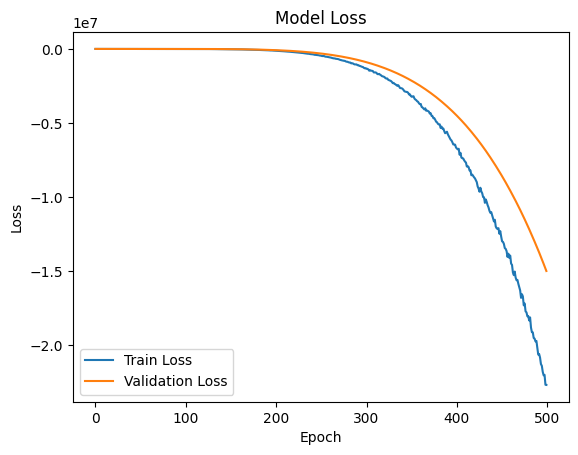

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Shannon Entropy Model Accuracy: 0.646
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       114
           1       0.41      0.76      0.54        55
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         5

    accuracy                           0.65       209
   macro avg       0.26      0.32      0.28       209
weighted avg       0.58      0.65      0.60       209



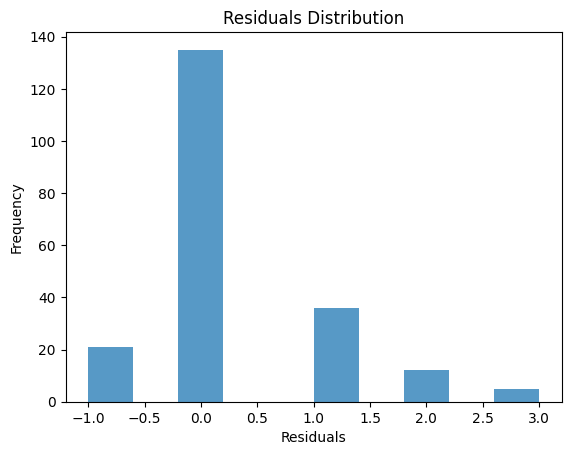

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Get the list of categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Define the preprocessing step (OneHotEncoder for categorical variables)
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns unchanged
)

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Network": MLPClassifier(random_state=42)
}

# Dictionary to store model accuracies
model_accuracies = {}

# Iterate over models, create a pipeline, train, predict, and print accuracy
for name, model in models.items():
    print(f"Training {name}...")

    # Create a pipeline for each model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Encode categorical variables
        ('model', model)  # Model training step
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy in the dictionary
    model_accuracies[name] = accuracy

    # Print accuracy and classification report on a new line
    print(f"{name} Accuracy: {np.round(accuracy, 3)}\n")

# Find the best model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]
print(f"The best model is {best_model} with an accuracy of {np.round(best_accuracy, 3)*100}")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import tensorflow as tf

# Load and preprocess the heart disease dataset (assuming `df` is your DataFrame)
X = df.drop('num', axis=1)  # Features
y = df['num']  # Target variable (heart disease presence/absence)

# One-hot encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Apply one-hot encoding
X = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the adapted Shannon Entropy model for classification
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with binary crossentropy for classification
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=512, validation_data=(X_test, y_test))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Shannon Entropy Model Accuracy: {accuracy:.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Residual Analysis (Optional, but useful for binary classification insight)
residuals = y_test - y_pred.flatten()
plt.hist(residuals, bins=10, alpha=0.75)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5402 - loss: 1.2812 - val_accuracy: 0.5837 - val_loss: 1.1902
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5196 - loss: 1.2125 - val_accuracy: 0.6124 - val_loss: 1.1403
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5361 - loss: 1.1335 - val_accuracy: 0.5455 - val_loss: 1.0959
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5402 - loss: 1.0753 - val_accuracy: 0.4689 - val_loss: 1.0531
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4845 - loss: 1.0332 - val_accuracy: 0.4354 - val_loss: 1.0097
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.4495 - loss: 0.9691 - val_accuracy: 0.4306 - val_loss: 0.9652
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.4433 - loss: 0.9176 - val_accuracy: 0.4354 - val_loss: 0.9203
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4144 - loss: 0.8699 - val_accuracy: 0.4354 - val_los

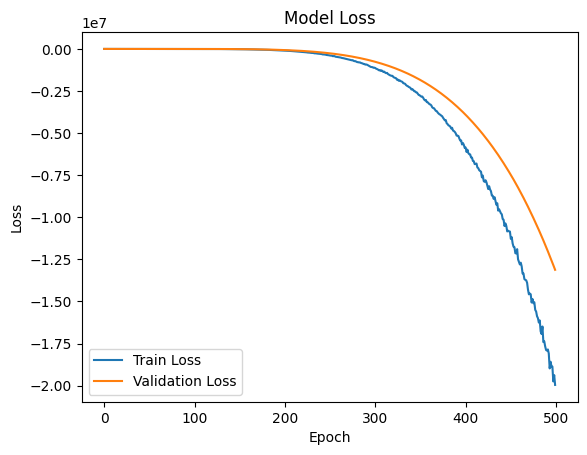

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Shannon Entropy Model Accuracy: 0.641
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       114
           1       0.41      0.80      0.54        55
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         5

    accuracy                           0.64       209
   macro avg       0.26      0.32      0.28       209
weighted avg       0.59      0.64      0.60       209



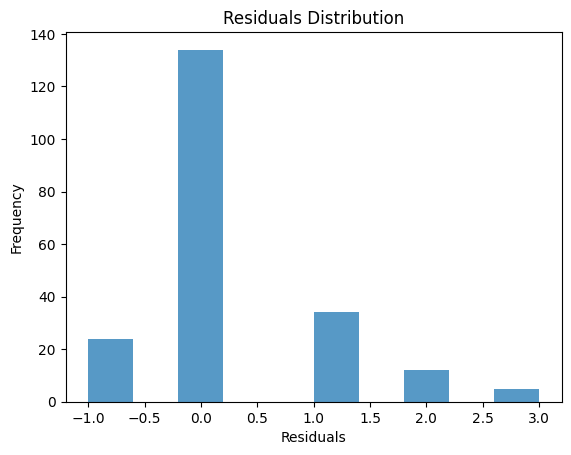

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import tensorflow as tf

# Load and preprocess the heart disease dataset (assuming `df` is your DataFrame)
X = df.drop('num', axis=1)  # Features
y = df['num']  # Target variable (heart disease presence/absence)

# One-hot encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Apply one-hot encoding
X = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the adapted Shannon Entropy model for classification
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with binary crossentropy for classification
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=512, validation_data=(X_test, y_test))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Shannon Entropy Model Accuracy: {accuracy:.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Residual Analysis (Optional, but useful for binary classification insight)
residuals = y_test - y_pred.flatten()
plt.hist(residuals, bins=10, alpha=0.75)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()